# Classifying Fashion-MNIST

We'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

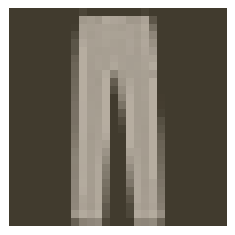

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We will  use ReLU activations for the layers and to return the logits from the forward pass.

In [4]:
# Define your network architecture here
from collections import OrderedDict

input_size = 784
hidden_sizes = [128, 64]
output_sizes = 10

#feed forward network
model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(input_size, hidden_sizes[0])),
            ('relu1', nn.ReLU()),
            ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('relu2', nn.ReLU()),
            ('logits', nn.Linear(hidden_sizes[1], output_sizes))]))
    

# Train the network

Now we'll create our network and train it. First we'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### training the model

In [6]:
epochs = 3
print_every = 100
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        
        
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 2.1088
Epoch: 1/3...  Loss: 1.5095
Epoch: 1/3...  Loss: 1.0725
Epoch: 1/3...  Loss: 0.8880
Epoch: 1/3...  Loss: 0.7747
Epoch: 1/3...  Loss: 0.7225
Epoch: 1/3...  Loss: 0.6988
Epoch: 1/3...  Loss: 0.6573
Epoch: 1/3...  Loss: 0.6291
Epoch: 2/3...  Loss: 0.3788
Epoch: 2/3...  Loss: 0.6098
Epoch: 2/3...  Loss: 0.5837
Epoch: 2/3...  Loss: 0.5826
Epoch: 2/3...  Loss: 0.5641
Epoch: 2/3...  Loss: 0.5435
Epoch: 2/3...  Loss: 0.5224
Epoch: 2/3...  Loss: 0.5166
Epoch: 2/3...  Loss: 0.5314
Epoch: 3/3...  Loss: 0.1206
Epoch: 3/3...  Loss: 0.5010
Epoch: 3/3...  Loss: 0.5011
Epoch: 3/3...  Loss: 0.4964
Epoch: 3/3...  Loss: 0.4890
Epoch: 3/3...  Loss: 0.4962
Epoch: 3/3...  Loss: 0.4875
Epoch: 3/3...  Loss: 0.4963
Epoch: 3/3...  Loss: 0.4753
Epoch: 3/3...  Loss: 0.4791


### Testing the model with testing data

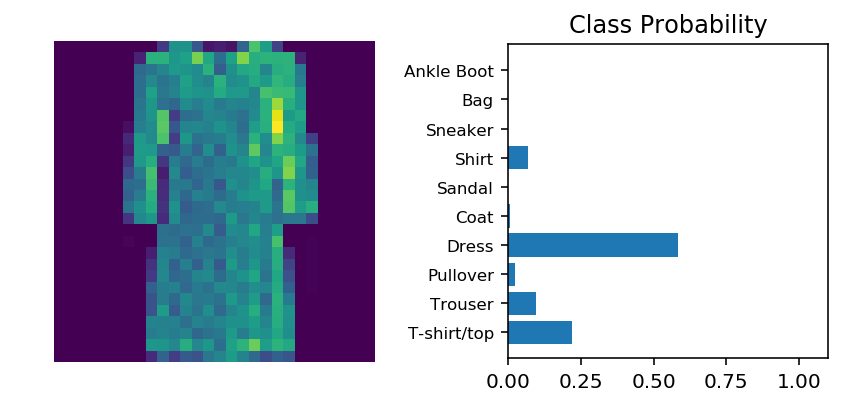

In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)

# Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')